In [1]:
!which python

/opt/anaconda3/envs/ml_/bin/python


### 2 REGRESSION

#### 2.2: Data Preparation

In [38]:
# !pip install seaborn

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv('../data/cars.csv')

In [8]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


#### Lets implement some data cleaning to ensure consistency

In [10]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [15]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [16]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [23]:
string_vals = list(df.dtypes[df.dtypes == 'object'].index)

In [25]:
string_vals

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [27]:
for col in string_vals:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [28]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


#### 2.3 Exploratory Data Analysis

In [34]:
# Check data in columns

# NB: Popularity refers to how popular the car is gotten from twitter
# Mentions about the car

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

#### Price Distribution

<Axes: xlabel='msrp', ylabel='Count'>

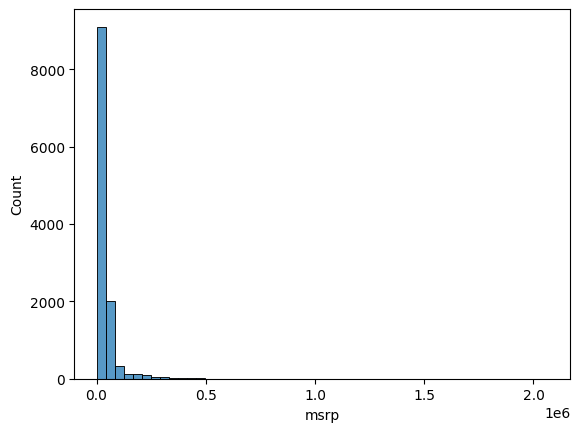

In [40]:
sns.histplot(df.msrp, bins=50)

#### This produces a long tail distribution with many cheap cars

In [ ]:
Looking at the most populated area more closely

<Axes: xlabel='msrp', ylabel='Count'>

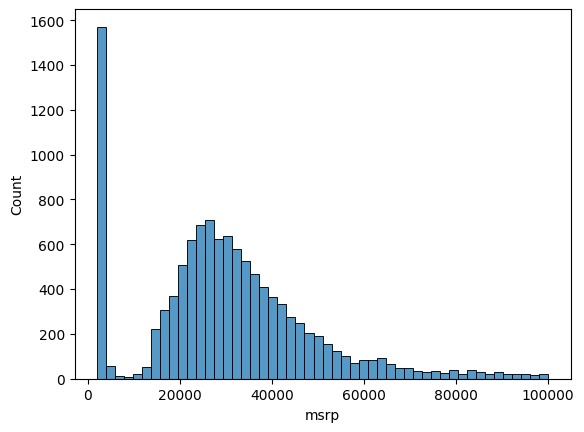

In [41]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

#### Gives us a much more clearer picture looking as a normal curve

#### NB: This kind of distribution might most likely confuse our model as it has outliers and long tails which we must remove

In [47]:
# We can use logs to shrink this values for ml
# Also we add 1 to the values so we dont accidentally be
# looking for the log of 0, we use log1p for this

np.log1p([1, 10, 1000, 1000000])

array([ 0.69314718,  2.39789527,  6.90875478, 13.81551156])

In [50]:
df.msrp.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: msrp, dtype: int64

In [51]:
price_logs = np.log1p(df.msrp)

In [52]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

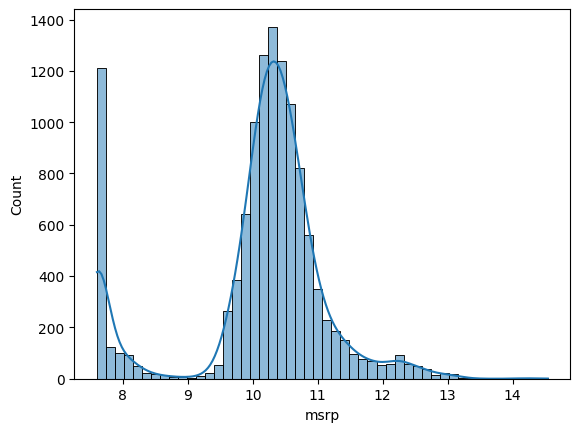

In [57]:
sns.histplot(price_logs, bins=50, kde=True)

#### Gives us a much clearer normal curve that our ml models like

#### Taking note of the missing values

In [59]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [67]:
df.shape[0]

11914

#### 2.4 Setting up validation framework

In [395]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [396]:
n_test, n_val, n_train

(2382, 2382, 7150)

In [397]:
df.iloc[:5]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [398]:
df_train = df.iloc[:n_train] # first 7150 records
df_val = df.iloc[n_train:n_train+n_val] # next 2382 records
df_test = df.iloc[n_train+n_val:]

In [399]:
len(df_train)

7150

#### The above might miss some values in train not in test or val. We need to shuffle

In [464]:
idx = np.arange(n)

In [465]:
np.random.seed(42)
np.random.shuffle(idx) # shuffle index values to be random

In [466]:
idx

array([3995, 7474, 7300, ..., 5390,  860, 7270], shape=(11914,))

In [467]:
idx_train = idx[n_train:]
idx_train

array([3416,  307, 3908, ..., 5390,  860, 7270], shape=(4764,))

In [468]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
d_test = df.iloc[idx[n_train+n_val:]]

In [469]:
df_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650


In [470]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [471]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [472]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385
1,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385
2,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,24,18,1385
3,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,24,18,1385
4,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,rear_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,24,18,1385


In [409]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [410]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

#### 2.5: Linear Regression

In [210]:
# An example
df_train.iloc[12]

make                             nissan
model                             truck
year                               1995
engine_fuel_type       regular_unleaded
engine_hp                         134.0
engine_cylinders                    4.0
transmission_type                manual
driven_wheels          four_wheel_drive
number_of_doors                     2.0
market_category                     NaN
vehicle_size                    compact
vehicle_style        regular_cab_pickup
highway_mpg                          19
city_mpg                             16
popularity                         2009
Name: 12, dtype: object

In [196]:
xi = [106.0, 30, 2031] #engine_hp, city_mpg, popularity

In [182]:
w0 = 0
w = [0.01, 0.04, 0.002] 

In [183]:
# We need something like

def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [184]:
linear_regression(xi)

6.322

In [188]:
np.expm1(6.322).item() #Getting back from the log 1p value, we take the exponent

555.6852503234251

#### 2.6: Linear Regression vector form

In [199]:
def dot(xi, w):
    n = len(xi)
    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [200]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [201]:
w0 = 7.17 #Weight when first feature of xi = 1

In [202]:
w_ = [w0] + w

In [203]:
w_

[7.17, 0.01, 0.04, 0.002]

In [207]:
# NB: dot prod uses transpose of feature vector/matrix

In [204]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_)

In [205]:
linear_regression(xi)

13.492

#### Now for the full matrix

In [206]:
# For m rows and n columns, p = 1 col.

In [ ]:
# So for matrix (m x n) x (n x p) = (m x p) = predictions

In [ ]:
# x1T*w, x2T*w, .....

### Let's do an example

In [222]:
# If our sample rows have the follow
x1 = [1, 106.0, 30, 2031] # 1 is added to maintain the weight w0
x2 = [1, 150, 15, 586]
x3 = [1, 134, 16, 2009]

w0 = 7.17
w = [0.01, 0.04, 0.002]
w_ = [w0] + w

# Our matrix
X = [x1, x2, x3]

X = np.array(X)
X.astype(int)
X

array([[   1.,  106.,   30., 2031.],
       [   1.,  150.,   15.,  586.],
       [   1.,  134.,   16., 2009.]])

In [224]:
X.dot(w_) 

#Gives us the predictions of these records, 
#look the first still same as before

array([13.492, 10.442, 13.168])

In [225]:
def linear_regression(X):
    return X.dot(w_)

In [226]:
linear_regression(X)

array([13.492, 10.442, 13.168])

### 2.7: Training a Linear Regression Model

In [320]:
# Lets create an arbitrary X

import random
# Create a 2D list: 9 inner lists, each with 3 random integers (0–100)
X = [[random.randint(0, 500) for _ in range(3)] for _ in range(9)]
X = np.array(X)
y = [10000, 20000, 15000, 20500, 10000, 20000, 15000, 25000, 12000]

In [322]:
X, y

(array([[314, 184, 424],
        [ 20, 362, 143],
        [  0, 403, 131],
        [155, 441, 176],
        [ 37, 248,  84],
        [  8, 252,  96],
        [ 78, 350, 273],
        [355, 127,  43],
        [367,  45,  72]]),
 [10000, 20000, 15000, 20500, 10000, 20000, 15000, 25000, 12000])

In [312]:
# Verify
# XTX.dot(XTX_inv)  # Indentity matrix

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-0., -0.,  1.,  0.],
       [-0.,  0., -0.,  1.]])

In [323]:
def train_lR(X, y):
    # Now we need the element at X = 1, for w0
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    # Now to approximate the weights
    w__ = XTX_inv.dot(X.T).dot(y)
    w0 = w__[0]
    w = w__[1:]
    return (w0, w)

In [324]:
train_lR(X, y)

(np.float64(9113.81766847415),
 array([ 21.99435216,  31.90971675, -28.3155767 ]))

### 2.8: Car price baseline model

In [411]:
# df_train.dtypes
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [412]:
numeric_cols = list(df.dtypes[df.dtypes != 'object'].index)

In [577]:
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)

In [579]:
categorical_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [413]:
numeric_cols

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity',
 'msrp']

In [546]:
base = [
    'engine_hp',
     'engine_cylinders',
     'highway_mpg',
     'city_mpg',
     'popularity'
]

In [547]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [449]:
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,275.0,6.0,18,13,549
1,170.0,4.0,38,25,873
2,248.0,6.0,28,19,2202
3,138.0,4.0,36,25,1385
4,162.0,4.0,20,17,870


In [426]:
# nans can be gotten as our weights if nans exist, so we can get rid of nans
df_train[base].isna().sum()

engine_hp           52
engine_cylinders    16
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [428]:
df_train = df_train[base].fillna(0)

In [429]:
df_train[base].isna().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [430]:
X_train = df_train[base].values
X_train

array([[ 275.,    6.,   18.,   13.,  549.],
       [ 170.,    4.,   38.,   25.,  873.],
       [ 248.,    6.,   28.,   19., 2202.],
       ...,
       [ 150.,    4.,   24.,   17., 1851.],
       [ 160.,    4.,   31.,   22.,  204.],
       [ 274.,    4.,   27.,   17., 1439.]], shape=(7150, 5))

In [431]:
y_train #From the initial processing of the dataset up up!

array([10.29876764, 10.32535081, 10.53611479, ...,  9.83258214,
        9.96062374, 10.28537692], shape=(7150,))

In [433]:
# Use model trainer function

w0, w = train_lR(X_train, y_train)

In [436]:
# Now we can make predictions

# Lets apply same model to train df
w.shape

(5,)

In [437]:
X_train.shape

(7150, 5)

In [438]:
y_train.shape

(7150,)

In [442]:
y_pred = w0 + X_train.dot(w) # => Equivalent to what we had 

<Axes: ylabel='Count'>

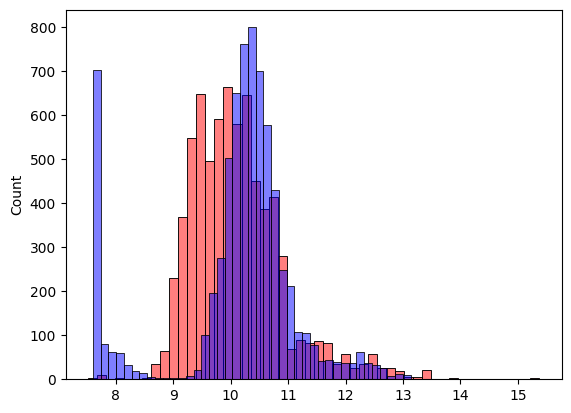

In [443]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, color='blue', bins=50, alpha=0.5)

### 2.9 & 2.10: RMSE

In [446]:
# Let's create our rmse
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [447]:
rmse(y_train, y_pred)

np.float64(0.7570200472453602)

In [453]:
# Now use on validation set
# First let's wrap creation of X in a function

def prepare_X(df):
    df_numerical = df[base]
    df_numerical = df[base].fillna(0)
    X = df_numerical.values
    return X

In [455]:
X_train = prepare_X(df_train)
w0, w = train_lR(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w) # => Equivalent to what we had 

In [462]:
np.round(rmse(y_val, y_pred), 2).item()

0.74

### 2.11: Some Feature Engineering

In [475]:
# Lets try improving the model's accuracy by decreasing RMSE
# We can calculate the age of each car say from the max year
df_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650


In [480]:
max_year = df_train.year.max()

In [527]:
max_year

np.int64(2017)

In [481]:
max_year - df_train.year

0       12
1        1
2        1
3        2
4       26
        ..
7145    14
7146     2
7147    11
7148    12
7149     3
Name: year, Length: 7150, dtype: int64

In [545]:
# base.append('age')

In [548]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [549]:
# Let's update our prep function
def prepare_X(df):
    df = df.copy()
    df['age'] = max_year - df.year
    features = base + ['age']
    df_numerical = df[features]
    df_numerical = df_numerical.fillna(0)
    X = df_numerical.values
    return X

In [550]:
X_train = prepare_X(df_train)
w0, w = train_lR(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w) # => Equivalent to what we had 

In [551]:
np.round(rmse(y_val, y_pred), 2).item() # Model improved as error reduced

0.51

<Axes: ylabel='Count'>

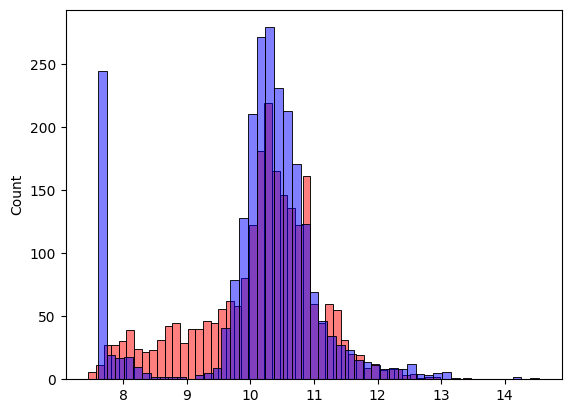

In [552]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_val, color='blue', bins=50, alpha=0.5)

### 2.12: Categorical Variables

In [554]:
df_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695,0,0,1
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495,0,0,1
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650,0,0,1


In [555]:
df_train.number_of_doors.unique()

array([ 4.,  2.,  3., nan])

In [556]:
for v in [2,3,4]:
    df_train['num_doors_%s' %v] = (df_train.number_of_doors == v).astype('int')

In [557]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695,0,0,1
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495,0,0,1
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650,0,0,1
3,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170,0,0,1
4,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000,0,0,1


In [563]:
# Let's update our prep function
def prepare_X(df):
    df = df.copy()
    df['age'] = max_year - df.year
    features = base + ['age'] #new array
    
    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
        
    df_numerical = df[features]
    df_numerical = df_numerical.fillna(0)
    X = df_numerical.values
    return X

In [564]:
prepare_X(df_train)

array([[275.,   6.,  18., ...,   0.,   0.,   1.],
       [170.,   4.,  38., ...,   0.,   0.,   1.],
       [248.,   6.,  28., ...,   0.,   0.,   1.],
       ...,
       [150.,   4.,  24., ...,   0.,   0.,   1.],
       [160.,   4.,  31., ...,   1.,   0.,   0.],
       [274.,   4.,  27., ...,   1.,   0.,   0.]], shape=(7150, 9))

In [567]:
X_train = prepare_X(df_train)
w0, w = train_lR(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w) # => Equivalent to what we had 

np.round(rmse(y_val, y_pred), 2).item() # Model doesnt improve much by number of doors

0.51

#### Let's try the make of the car

In [574]:
makes = list(df.make.value_counts().head().index)

In [575]:
# Let's update our prep function
def prepare_X(df):
    df = df.copy()
    df['age'] = max_year - df.year
    features = base + ['age'] #new array
    
    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
        
    df_numerical = df[features]
    df_numerical = df_numerical.fillna(0)
    X = df_numerical.values
    return X

In [576]:
X_train = prepare_X(df_train)
w0, w = train_lR(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

np.round(rmse(y_val, y_pred), 2).item() 

0.5

In [ ]:
# And so on for other categorical values

In [580]:
categories = {}

for c in categorical_cols:
    categories[c] = list(df[c].value_counts().head().index)

In [586]:
# Let's update our prep function one more time
def prepare_X(df):
    df = df.copy()
    df['age'] = max_year - df.year
    features = base + ['age'] #new array
    
    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    for c, vals in categories.items():
        for v in vals:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' %(c, v))
        
    df_numerical = df[features]
    df_numerical = df_numerical.fillna(0)
    X = df_numerical.values
    return X

In [589]:
X_train = prepare_X(df_train)
w0, w = train_lR(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

np.round(rmse(y_val, y_pred), 2).item() #Damn!! SO large RMSE

231.56

In [592]:
w0.item() #Very large weight at x = 1, and other weights are unreasonably large

1.5766668296061076e+16

### 2.13 Regularization

In [593]:
w

array([ 5.54876788e-01, -6.45114407e+01, -1.09635044e+01,  6.44197066e+00,
        1.52754968e-04,  1.51446397e-02, -7.99887764e+03, -7.98754464e+03,
       -7.99624928e+03,  8.21745263e+00, -1.23816647e+01,  6.53072604e+00,
       -1.70832388e+01,  6.37037787e+00, -2.58144656e+01,  1.27215104e+01,
       -1.30844941e+01, -7.58239330e+00, -7.77363907e+00, -4.60621497e+01,
       -5.47970792e+01, -5.49783015e+01, -4.56365895e+01, -4.74077549e+01,
       -2.17282555e+15, -2.17282555e+15, -2.17282555e+15, -2.17282555e+15,
       -2.17282555e+15, -1.35938427e+16, -1.35938427e+16, -1.35938427e+16,
       -1.35938427e+16,  5.94299890e+00,  1.01570975e+01,  8.93835934e+00,
        9.00163390e-01, -6.52398423e+00, -6.14665025e+01, -5.14898036e+01,
       -4.12909329e+01, -7.11782328e-02,  1.12249775e-03,  1.55689152e-01,
        3.11539610e-01, -1.70247527e-01])

In [601]:
# Remember, w = Gram Matrix * X transpose * y

# Problems typically can occur when you try to find the inverse of a Gram matrix (XTX) in cases where two columns are identical
# An error of singular matrix occurs. E.g

arr = [
    [1,3,3],
    [2,2,2],
    [3,1,1],
]

X_s = np.array(arr)
X_sTX_s = X_s.T.dot(X_s)
np.linalg.inv(X_sTX_s)

LinAlgError: Singular matrix

In [ ]:
# We can add a small number to the diagonals of the matrix to remove any singularity in the matrix

In [623]:
arr = [
    [1,3,3],
    [2,2,2],
    [3,1,1],
]

X_s = np.array(arr)
X_sTX_s = X_s.T.dot(X_s)
np.linalg.inv(X_sTX_s)

LinAlgError: Singular matrix

In [614]:
# So better still we can use the identity matrix with a small number as such
eye = 0.01 * np.eye(3)

In [615]:
eye

array([[0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.01]])

In [618]:
X_sTX_s = X_sTX_s + eye

In [621]:
np.linalg.inv(X_sTX_s) #Much better :> This is known as regularization!

array([[  0.14556691,  -0.05196962,  -0.05196962],
       [ -0.05196962,  50.03640472, -49.96359528],
       [ -0.05196962, -49.96359528,  50.03640472]])

In [622]:
# Simply mean we now can control the weights so they do not grow too much

#### NB: The 0.01 becomes a parameter her which helps control how much the weights grow. If we reduce it, weights increase, and vice versa

In [624]:
# Now lets redo our model training and inference
# Where r = regularisation parameter

def train_lR_reg(X, y, r=0.001):
    # Now we need the element at X = 1, for w0
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    eye = r * np.eye(XTX.shape[0])    
    XTX = XTX + eye
    
    XTX_inv = np.linalg.inv(XTX)
    
    # Now to approximate the weights
    w__ = XTX_inv.dot(X.T).dot(y)
    w0 = w__[0]
    w = w__[1:]
    return (w0, w)

In [627]:
X_train = prepare_X(df_train)
w0, w = train_lR_reg(X_train, y_train, r=0.01) #r can be changed to find the best spot

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

np.round(rmse(y_val, y_pred), 2).item() #Damn!! SO large RMSE

0.45

In [ ]:
# Now this is veryyyy much better!

### 2.14 Tuning the Model

#### Here we find the best value for 'r' since its affects the quality of our model

In [629]:
for r in [0.0, 0.0000001, 0.0001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_lR_reg(X_train, y_train, r=r) #r can be changed to find the best spot
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = np.round(rmse(y_val, y_pred), 2).item()
    print(r, w0, score)

0.0 1.5766668296061076e+16 231.56
1e-07 -598.7606550436019 0.45
0.0001 6.375967572659045 0.45
0.1 6.234119574133832 0.45
1 5.575358695864111 0.45
10 4.284557218360413 0.46


In [ ]:
# 0.001 looks great and stable

### 2.15 Training the final Model

In [631]:
# Let's combine the train and val sets to make combined 80% and use test for 20%

In [632]:
df_full_train = pd.concat([df_train, df_val])

In [636]:
df_full_train = df_full_train.reset_index(drop=True) #Resets the index and drops that column

In [638]:
df_full_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695,0.0,0.0,1.0
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495,0.0,0.0,1.0
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650,0.0,0.0,1.0


In [639]:
X_full_train =  prepare_X(df_full_train)

In [640]:
X_full_train

array([[275.,   6.,  18., ...,   0.,   0.,   0.],
       [170.,   4.,  38., ...,   0.,   0.,   0.],
       [248.,   6.,  28., ...,   0.,   0.,   0.],
       ...,
       [310.,   8.,  19., ...,   0.,   0.,   0.],
       [190.,   6.,  16., ...,   0.,   0.,   0.],
       [302.,   4.,  30., ...,   0.,   0.,   0.]], shape=(9532, 46))

In [641]:
y_full_train = np.concatenate([y_train, y_val])

In [642]:
y_full_train

array([10.29876764, 10.32535081, 10.53611479, ..., 10.34016059,
       10.18229284, 10.65374731], shape=(9532,))

In [646]:
w0, w = train_lR_reg(X_full_train, y_full_train, r=0.001) #r can be changed to find the best spot

In [647]:
w0

np.float64(6.343222564809511)

In [648]:
w

array([ 0.00164086,  0.11286897, -0.00727152, -0.00538701, -0.00005483,
       -0.09715136, -0.773021  , -0.94243078, -0.60864013, -0.05236135,
        0.19416623,  0.02604519, -0.01411388, -0.12356006, -0.25504999,
       -0.59931798, -0.31831851, -0.34342736, -0.29435399, -0.44098583,
        0.09571521, -0.28573196, -0.48833488, -0.04542336,  1.08011183,
        0.89162072,  1.13914334,  2.69754133,  0.52860833,  1.62649577,
        1.53432761,  1.61842498,  1.5630529 , -0.07801997,  0.11343089,
       -0.05377346, -0.03312024,  0.002469  ,  2.17552659,  2.07107504,
        2.09560672, -0.08354388, -0.00473056,  0.16812903,  0.33549931,
       -0.17828615])

In [651]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = np.round(rmse(y_test, y_pred), 2).item()
score #Pretty good score achieved!

0.42

In [ ]:
#So this shows generalization and that this score wasn't just gotten by chance

### 2.15: Using the Model

In [ ]:
# So let's simulate a car prediction

In [652]:
# Asume this comes from a dictionary (A JSON like response from an API call)
car = df_test.iloc[20].to_dict()

In [653]:
car

{'make': 'chevrolet',
 'model': 'silverado_1500',
 'year': 2016,
 'engine_fuel_type': 'flex-fuel_(unleaded/e85)',
 'engine_hp': 285.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'flex_fuel',
 'vehicle_size': 'large',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 22,
 'city_mpg': 17,
 'popularity': 1385}

In [654]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,silverado_1500,2016,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,22,17,1385


In [655]:
X_small = prepare_X(df_small)

In [657]:
y_pred = w0 + X_small.dot(w)
y_pred

array([10.34687694])

In [661]:
car_price = np.expm1(y_pred[0])
car_price = np.round(car_price, 2).item()

In [663]:
print(f'The car price is: {car_price} dollars')

The car price is: 31158.58 dollars


In [666]:
np.expm1(y_test[20]) #Our prediction is pretty close

np.float64(31035.00000000002)